# Modelo de predicción de precios de venta automovilístico


---

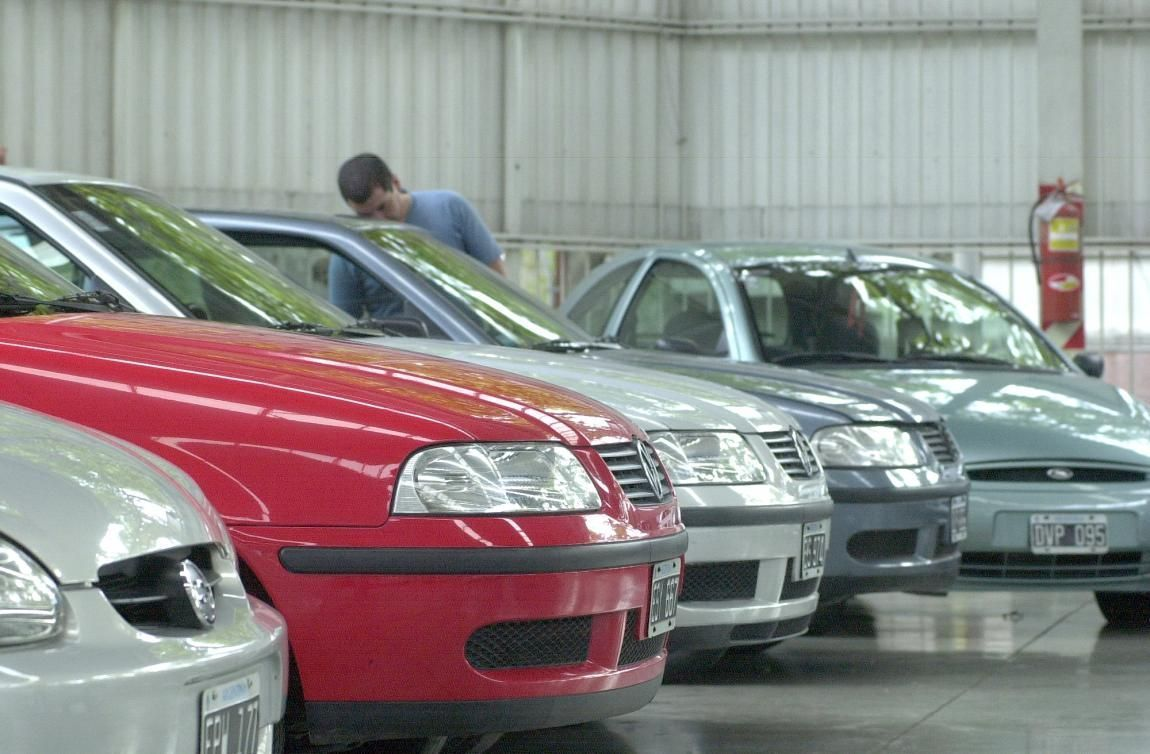


---




## **ÍNDICE**


1.   [Introducción](https://colab.research.google.com/drive/1i61YlGHTaacValhzfIOjUmSFNC84JIwR#scrollTo=oAlk338bpAw6&line=4&uniqifier=1)
2.   [Data Wrangling](https://colab.research.google.com/drive/1i61YlGHTaacValhzfIOjUmSFNC84JIwR#scrollTo=xZTUooMavwHZ&line=1&uniqifier=1)
3.   [Análisis exploratorio de datos (EDA)](https://colab.research.google.com/drive/1i61YlGHTaacValhzfIOjUmSFNC84JIwR#scrollTo=KwEiMiOM7S56&line=1&uniqifier=1)
4.   [Modelado](https://colab.research.google.com/drive/1i61YlGHTaacValhzfIOjUmSFNC84JIwR#scrollTo=MrJCk9u_Ajyg&line=1&uniqifier=1)
5.   [Conclusión](https://colab.research.google.com/drive/1i61YlGHTaacValhzfIOjUmSFNC84JIwR#scrollTo=eJQKk8-XF6h7&line=2&uniqifier=1)





# **1. Introducción**






### **ABSTRACT**

Este proyecto va dirigido a empresas que se dediquen a la venta de automóviles nuevos o usados. El objetivo es facilitar el trabajo al momento de asignarle un precio a los automóviles que estén a la venta, ya que el modelo con el cual estoy trabajando tiene en cuenta las características de los vehículos para fijarle un precio.

El proyecto no está dirigido a ningún área especial, ya que se puede implementar tanto en grandes empresas como en empresas de una sola persona.
Decidí trabajar con estos datos ya que considero que un modelo así presenta gran versatilidad en diferentes topicos. Específicamente, en este caso, trabajo con automóviles, objetos que se puede aplicar fácilmente a la realidad, pero también se podría ajustar, por ejemplo,  a inmuebles y funcionaria. Esta versatilidad me genera interés, por eso me entusiasma este proyecto.

### **HIPÓTESIS**

Se puede crear un modelo para ayudar a los comerciantes a ajustar los precios de los vehículos en base a las características, ya que, en conjunto, se pueden comparar automóviles para definir el valor de cada uno.

### **OBJETIVO**

Hallar qué variables tienen valores importantes en el mercado para analizarlas y utilizarlas al momento de cotizar los vehículos.


## **1.1 IMPORTACIÓN DE LIBRERIAS Y CONEXIÓN A DRIVE**

In [45]:
# Importo librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**2. DATA WRANGLING**





El Data Wrangling consiste en la transformación y limpieza de datos para generar un Dataset más ordenado. Se realizó una descripción estadística general del dataset, se modificarón los valores necesarios y se buscaron datos nulos o duplicados que puedan influir en los procesos posteriores del modelado.

In [46]:
carsDF =  pd.read_csv('CarsDataset.csv', sep = ',')
carsDF

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [47]:
carsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [48]:
# Elimino la columna torque ya que es un dato que no infiere en nada y solo complica el dataframe.
carsDF = carsDF.drop(columns=['torque'], axis=1)

In [49]:
carsDF.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [50]:
# Transformo las columnas 'mileage', 'engine' y max_power' y las convierto en numerica para tratar los nulos
carsDF['mileage']=carsDF['mileage'].replace(' kmpl','',regex=True).str.replace(',', '')
carsDF['mileage']=carsDF['mileage'].replace(' km/kg','',regex=True).str.replace(',', '')
carsDF['engine']=carsDF['engine'].replace(' CC','',regex=True).str.replace(',', '')
carsDF['max_power']=carsDF['max_power'].replace(' bhp','',regex=True).str.replace(',', '')

carsDF['mileage'] = pd.to_numeric(carsDF['mileage'])
carsDF['engine'] = pd.to_numeric(carsDF['engine'])
carsDF['max_power'] = pd.to_numeric(carsDF['max_power'])
carsDF['selling_price'] = pd.to_numeric(carsDF['selling_price'])

carsDF

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [51]:
# Completo nulos de 'mileage' con la moda de estos
carsDF['mileage'] = carsDF['mileage'].fillna(carsDF['mileage'].mode()[0])

In [52]:
# Completo nulos de 'mileage' con la mediana de estos
carsDF['engine'] = carsDF['engine'].fillna(carsDF['engine'].median())

In [53]:
# Completo nulos de 'max_power' con la moda de estos
carsDF['max_power'] = carsDF['max_power'].fillna(carsDF['max_power'].mode()[0])

In [54]:
# Completo nulos de 'seats' con la mediana de estos
carsDF['seats'] = carsDF['seats'].fillna(carsDF['seats'].median())

In [55]:
carsDF.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [56]:
carsDF.shape

(8128, 12)

In [57]:
carsDF.duplicated().sum()

1202

In [58]:
# Borro los duplicados debido a que los datos para entrenar son suficientes aunque no esten estos arreglados de alguna otra forma
carsDF = carsDF.drop_duplicates()
carsDF.shape

(6926, 12)

**Analizo las columnas una por una para entenderlas mejor y comprender que mas hacer con estas**


---




In [59]:
carsDF['name'].nunique()

2058

'name' contiene muchos nombres diferentes por lo que es mejor eliminar la columna ya que no va a tener inferencia en el modelo

In [60]:
carsDF = carsDF.drop(columns=['name'], axis=1)

In [61]:
carsDF['year'].nunique()

29

'year' variable numerica

In [62]:
carsDF['selling_price'].nunique()

677

'selling_price' variable numerica

In [63]:
carsDF['km_driven'].nunique()

921

'km_driven' variable numerica

In [64]:
carsDF['fuel'].nunique()

4

'fuel' variable categorica

In [65]:
carsDF['seller_type'].nunique()

3

'seller_type' variable categorica

In [66]:
carsDF['transmission'].nunique()

2

'transmission' variable categorica

In [67]:
carsDF['owner'].nunique()

5

'owner' variable categorica

In [68]:
carsDF['mileage'].nunique()

381

'mileage' variable numerica

In [69]:
carsDF['engine'].nunique()

121

'engine' variable numerica

In [70]:
carsDF['max_power'].nunique()

319

'max_power' variable numerica

In [71]:
carsDF['seats'].nunique()

9

'seats' variable numerica

# **3. ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

##**3.1 GRÁFICOS**

###**3.1.1 INFLUENCIA DE LAS VARIABLES CATEGORICAS Y EL PRECIO DE VENTA**



Estas 4 variables podrian indicar tendencias de precios en relacion a que caracteristica posee los distintos vehiculos.

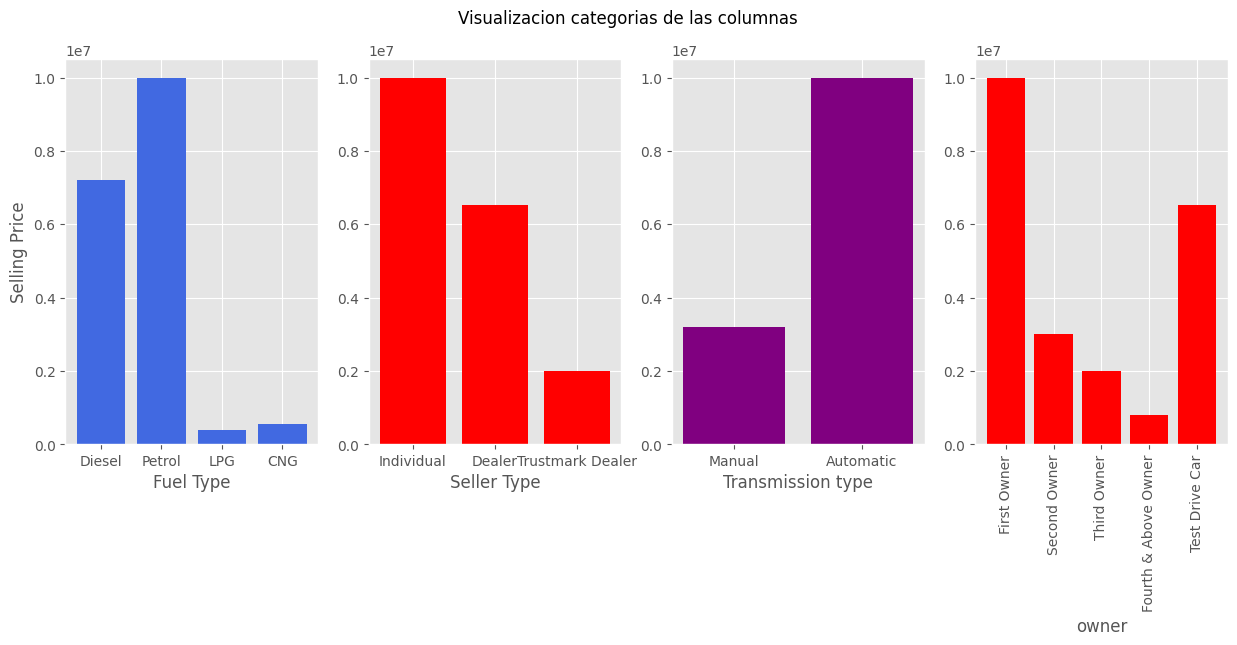

In [72]:
from matplotlib import style

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizacion categorias de las columnas')
plt.subplot(1,4,1)
plt.bar(carsDF['fuel'],carsDF['selling_price'], color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,4,2)
plt.bar(carsDF['seller_type'], carsDF['selling_price'], color='red')
plt.xlabel("Seller Type")
plt.subplot(1,4,3)
plt.bar(carsDF['transmission'], carsDF['selling_price'], color='purple')
plt.xlabel('Transmission type')
plt.subplot(1,4,4)
plt.bar(carsDF['owner'], carsDF['selling_price'], color='red')
plt.xticks(rotation=90)
plt.xlabel('owner')
plt.show()

**Fuel Type:** Se puede ver una tendencia a un precio elevado cuando los automoviles son de tipo Petrol o Diesel.


>
**Seller Type:** Si bien es mas distribuido que el anterior, cuando la venta es de un individuo sin ningun tercero el precio tiende a aumentar.


>
**Transmission Type:** Cuando un automovil es automatico su precio es claramente mayor segun este grafico.

>
**Owner:** El precio del vehiculo tiene a aumentar mientras menos dueño tenga.












### **3.1.2 ¿EXISTEN VALORES FUERA DE LOS "NORMALES" QUE PUEDAN AFECTAR ESTAS VARIABLES**


Text(0.5, 0, 'Selling_Price')

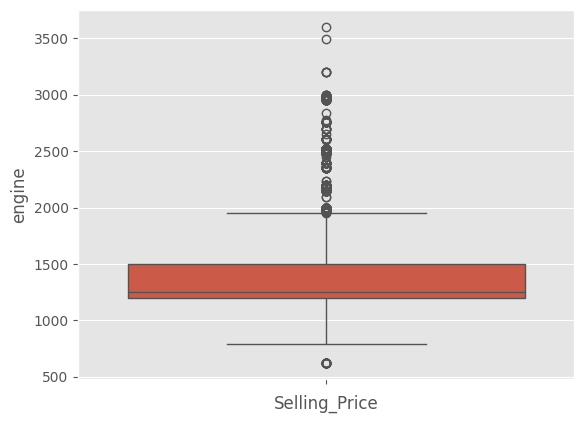

In [73]:
sns.boxplot(carsDF['engine'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

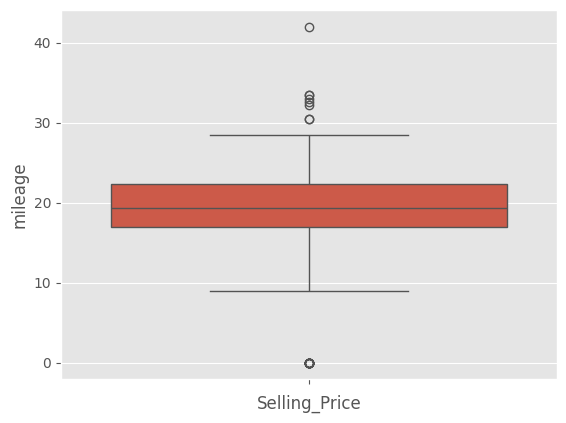

In [74]:
sns.boxplot(carsDF['mileage'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

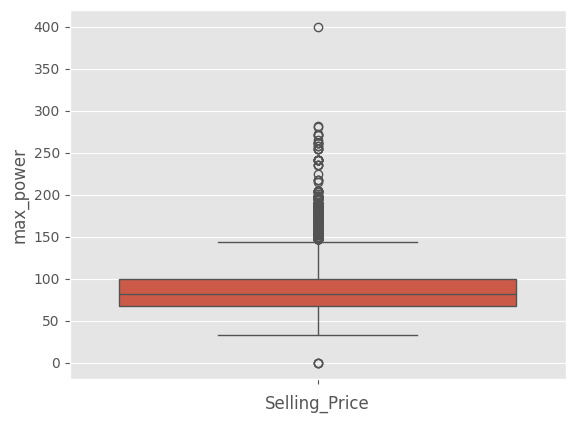

In [75]:
sns.boxplot(carsDF['max_power'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

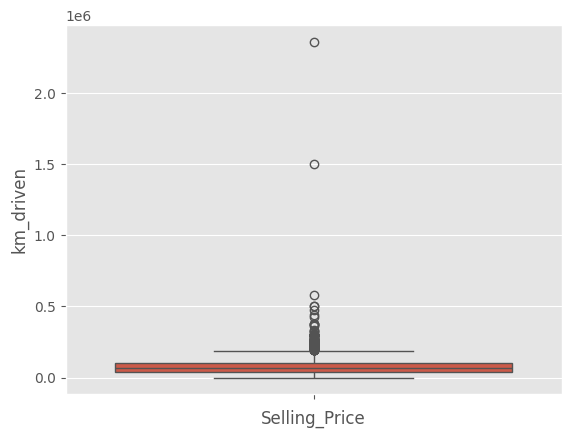

In [76]:
sns.boxplot(carsDF['km_driven'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

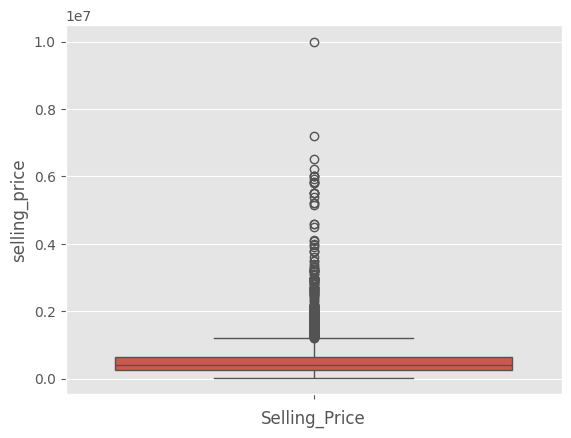

In [77]:
sns.boxplot(carsDF['selling_price'])
plt.xlabel('Selling_Price')

**A raíz de estos gráficos, deicido tratar los valores "outliers" con los quartiles 25 y 75 de cada variable. Esta decisión proviene de que esto puede afectar negativamente al modelo**

Text(0.5, 0, 'Selling_Price')

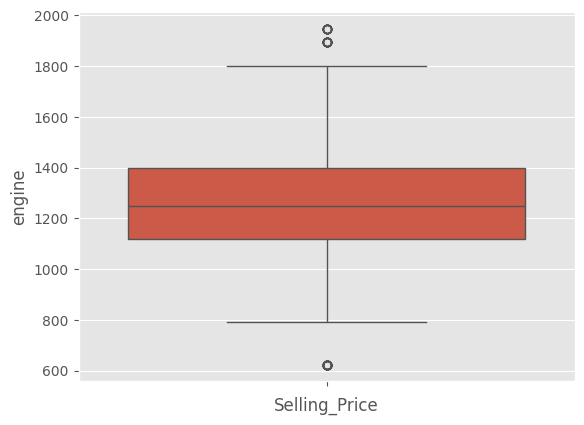

In [78]:
Q1 = carsDF['engine'].quantile(0.25)
Q3 = carsDF['engine'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

carsDF[carsDF['engine']> upper_limit]
carsDF[carsDF['engine']< lower_limit]

carsDF = carsDF[carsDF['engine'] < upper_limit]

sns.boxplot(carsDF['engine'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

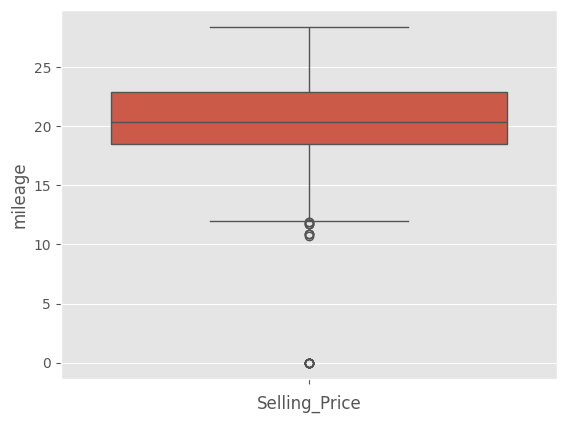

In [79]:
Q1 = carsDF['mileage'].quantile(0.25)
Q3 = carsDF['mileage'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

carsDF[carsDF['mileage']> upper_limit]
carsDF[carsDF['mileage']< lower_limit]

carsDF = carsDF[carsDF['mileage'] < upper_limit]


sns.boxplot(carsDF['mileage'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

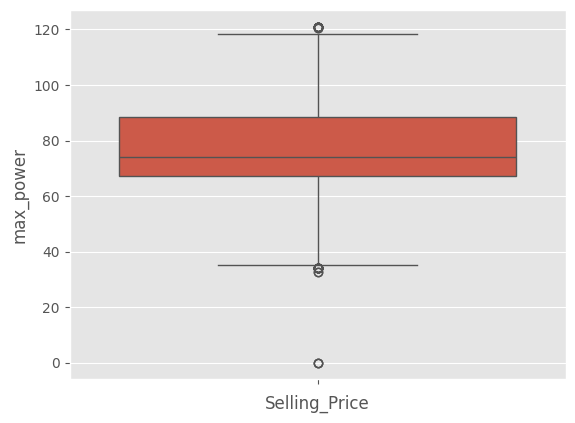

In [80]:
Q1 = carsDF['max_power'].quantile(0.25)
Q3 = carsDF['max_power'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

carsDF[carsDF['max_power']> upper_limit]
carsDF[carsDF['max_power']< lower_limit]

carsDF = carsDF[carsDF['max_power'] < upper_limit]

sns.boxplot(carsDF['max_power'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

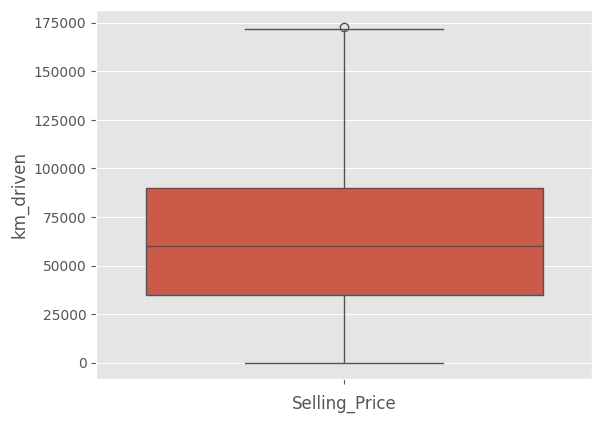

In [81]:
Q1 = carsDF['km_driven'].quantile(0.25)
Q3 = carsDF['km_driven'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

carsDF[carsDF['km_driven']> upper_limit]
carsDF[carsDF['km_driven']< lower_limit]

carsDF = carsDF[carsDF['km_driven'] < upper_limit]

sns.boxplot(carsDF['km_driven'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

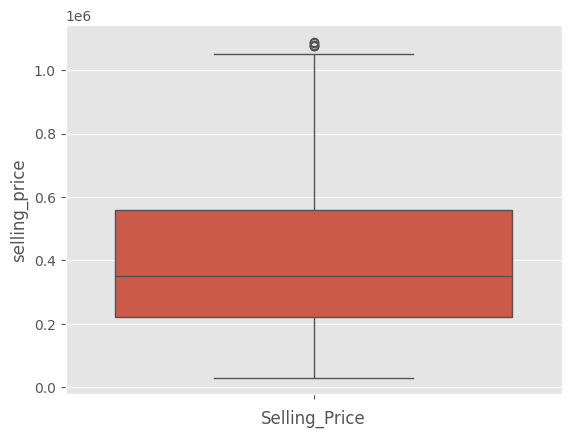

In [82]:
Q1 = carsDF['selling_price'].quantile(0.25)
Q3 = carsDF['selling_price'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

carsDF[carsDF['selling_price']> upper_limit]
carsDF[carsDF['selling_price']< lower_limit]

carsDF = carsDF[carsDF['selling_price'] < upper_limit]

sns.boxplot(carsDF['selling_price'])
plt.xlabel('Selling_Price')

## **3.2 CORRELACIÓN ENTRE LAS VARIABLES**


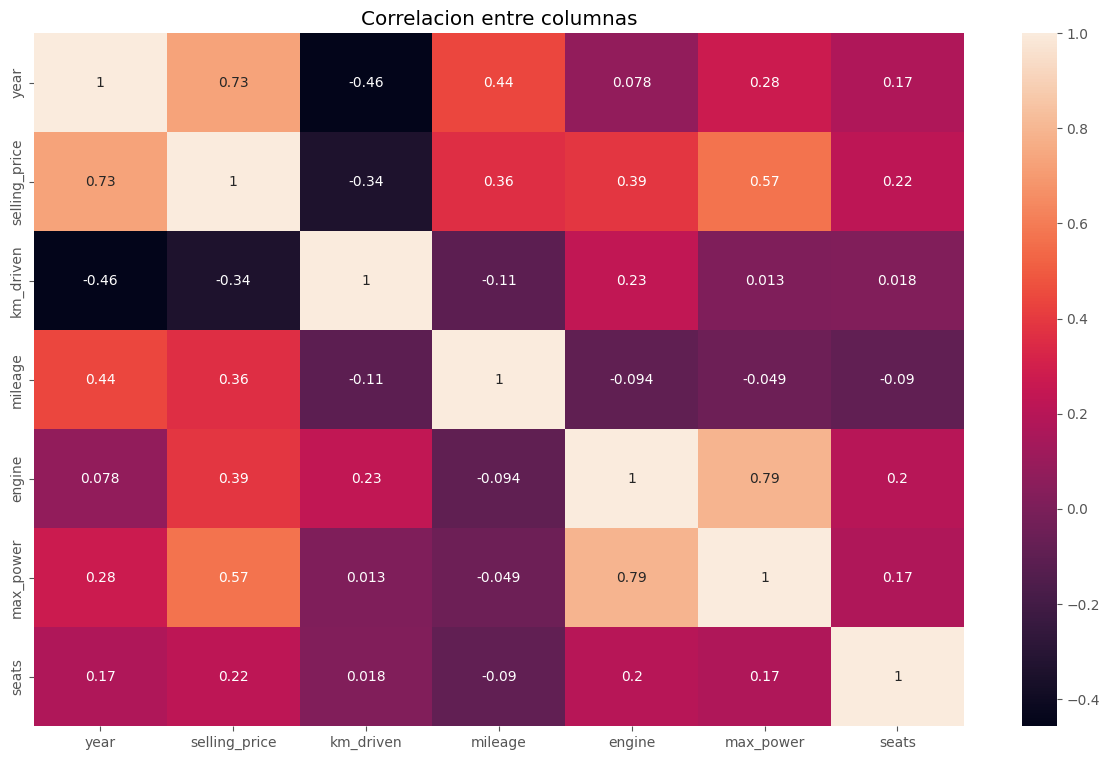

In [83]:
# Se crea un mapa de calor de la correlacion entre variables
plt.figure(figsize=(15,9))
sns.heatmap(carsDF.corr(numeric_only=True), annot=True)
plt.title('Correlacion entre columnas')
plt.show()

Podemos ver buenas correlaciones entre el precio, el año y la potencia maxima. Esto supone que estas variables influyan mucho en el precio.

## **3.4 CONCLUSIÓN DEL EDA**


* Una vez analizados los datos y entendido los graficos, las variables que se
utilizaran seran:

 *   Year
 *   Km_driven
 *   Fuel
 *   Seller_type
 *   Transmission
 *   Owner
 *   Mileage
 *   Engine
 *   Max_power
 *   Seats

* Los outliers siempre son un problema, por eso, decido trabajarlos para asi ajustar el modelo y que su nivel de acierto tal vez se incremente.




# **4. MODELADO**

## **4.1 PREPARACIÓN DEL DATASET PARA EL MODELADO**

Al contener variables categoricas debo convertilas en numericas, para eso usaremos un get_dummies.
>
Mi variables objetivo es 'selling_price' asi que la voy a separar del dataframe con las demas variables independientes.
>
x = variables independientes.
>
y = variable dependiente.

In [84]:
# Usamos get_dummies para transformar las variables categoricas
x = carsDF.drop(columns=['selling_price'], axis=1).reset_index(drop=True)
x = pd.get_dummies(x)
y = carsDF['selling_price']

In [85]:
x

,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
0,2014,145500,23.40,1248.0,74.00,5.0,False,True,False,False,False,True,False,False,True,True,False,False,False
1,2014,120000,21.14,1498.0,103.52,5.0,False,True,False,False,False,True,False,False,True,False,False,True,False
2,2006,140000,17.70,1497.0,78.00,5.0,False,False,False,True,False,True,False,False,True,False,False,False,True
3,2010,127000,23.00,1396.0,90.00,5.0,False,True,False,False,False,True,False,False,True,True,False,False,False
4,2007,120000,16.10,1298.0,88.20,5.0,False,False,False,True,False,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5313,2013,50000,18.90,998.0,67.10,5.0,False,False,False,True,False,True,False,False,True,False,False,True,False
5314,2014,80000,22.54,1396.0,88.73,5.0,False,True,False,False,False,True,False,False,True,False,False,True,False
5315,2013,110000,18.50,1197.0,82.85,5.0,False,False,False,True,False,True,False,False,True,True,False,False,False
5316,2007,119000,16.80,1493.0,110.00,5.0,False,True,False,False,False,True,False,False,True,False,True,False,False


In [86]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8121    260000
8122    475000
8123    320000
8124    135000
8125    382000
Name: selling_price, Length: 5318, dtype: int64

In [87]:
print("Tamaño de x: ",x.shape)
print("Tamaño de y: ", y.shape)

Tamaño de x:  (5318, 19)
Tamaño de y:  (5318,)


## **4.2 MODELO RANDOM FOREST**

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

In [89]:
print("Tamaño de x Test:", X_test.shape)
print("Tamaño de x Train:", X_train.shape)
print("Tamaño de y Test: ", y_test.shape)
print("Tamaño de y Train:", y_train.shape)

Tamaño de x Test: (1064, 19)
Tamaño de x Train: (4254, 19)
Tamaño de y Test:  (1064,)
Tamaño de y Train: (4254,)


In [90]:
# Definir la cuadrícula de hiperparámetros que deseas explorar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crea una instancia de GridSearchCV
model = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5) # Tarda 20 minutos aprox

# Ajusta el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir el X_test
y_pred=model.predict(X_test)

### **4.2.1 EVALUACIÓN DEL MODELO**
Finalmente se determina si el modelo entrenado es satisfactorio. Se usan los X de prueba para que el modelo prediga y luego se comparan con los Y de prueba.

* **Error Cuadrático Medio (MSE - Mean Squared Error):**
>
El **MSE** mide la diferencia cuadrada promedio entre las predicciones del modelo y los valores reales.
>
Calcula la magnitud del error al elevar al cuadrado la diferencia entre las predicciones y los valores reales, lo que penaliza más los errores grandes.
>
Mayor MSE indica que el modelo tiene más errores y es menos preciso.
>
* **Raíz del Error Cuadrático Medio (RMSE - Root Mean Squared Error):**
>
El **RMSE** es simplemente la raíz cuadrada del MSE.
>
Representa la desviación típica de los errores en la misma unidad que la variable objetivo.
>
Un RMSE más bajo indica un modelo más preciso y fácil de interpretar, ya que tiene menos error promedio.
>
* **Error Absoluto Medio (MAE - Mean Absolute Error):**
>
El **MAE** mide la diferencia promedio en valor absoluto entre las predicciones del modelo y los valores reales.
>
No cuadra los errores, por lo que no penaliza los errores grandes de la misma manera que el MSE.
>
El MAE es útil cuando los errores grandes no deben ser excesivamente penalizados.
>
* **Coeficiente de Determinación (R^2 - R-squared):**
>
El **R^2** mide la proporción de la variabilidad en la variable objetivo que es explicada por el modelo.
>
Un valor de R^2 cercano a 1 indica que el modelo explica una gran parte de la variabilidad en los datos y es un buen ajuste.
>
Un valor de R^2 cercano a 0 indica que el modelo no explica bien la variabilidad y es un mal ajuste.
>
Un valor negativo de R^2 sugiere que el modelo es peor que simplemente usar la media de los valores reales.

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular métricas de regresión
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R^2): {r2}')

MSE: 6452865813.569279
RMSE: 80329.73181561904
MAE: 56098.554114029794
R-squared (R^2): 0.8731164634365048


# 5. **CONCLUSIÓN**


Desde el inicio, nos sumergimos en una vasta colección de datos sobre automóviles, contemplando características técnicas e historiales de ventas. Trabajamos en la transformación de estos datos en información valiosa, seleccionando las variables que más impactan en los precios. Mediante un enfoque llamado random forest, establecemos relaciones matemáticas entre las variables y los precios. Esto nos brinda una "fórmula" que nos permite entender cómo las características específicas influyen en los precios. ¿Cómo nos beneficia esto? Imagina que deseamos establecer el precio de un nuevo modelo. Con nuestro modelo, podemos ingresar sus detalles y obtener una estimación. Esto también se aplica a vehículos usados: un recurso vital al planificar estrategias comerciales y tomar decisiones informadas para la venta de estos. En esencia, nuestro proyecto de Predicción de Precios de Automóviles es la fusión de tecnología y estrategia. Al centrarnos en datos, ciencia y análisis, estamos creando un puente entre la innovación y la toma de decisiones inteligentes.

## **5.1 MUESTRA DE FUNCIONAMIENTO CON UNA API**

In [99]:
import requests

url = 'https://api.mercadolibre.com/sites/MLA/search?q=ford&category_id=MLA1743'
response = requests.get(url)
data = response.json()

results = data.get('results', [])
rows = []

for result in results:
    title = result.get('title', 'N/A')
    price = result.get('price', 'N/A')

    attributes = result.get('attributes', [])
    attributes_dict = {}
    for attribute in attributes:
        attribute_id = attribute.get('id')
        if attribute_id:
            attributes_dict[attribute_id] = attribute.get('value_name', 'N/A')

    row = {
        'Title': title,
        'Price': price,
        **attributes_dict
    }
    rows.append(row)

# Crear DataFrame
dfApi = pd.DataFrame(rows)
dfApi

,Title,Price,ITEM_CONDITION,SINGLE_OWNER,TRACTION_CONTROL,HAS_AIR_CONDITIONING,ENGINE_DISPLACEMENT,PASSENGER_CAPACITY,BRAND,DOORS,ENGINE,FUEL_TYPE,KILOMETERS,MODEL,TRANSMISSION,TRIM,VEHICLE_YEAR,LENGTH,POWER
0,Ford F-150 5.0 Lariat Luxury At 4x4 2020,89900,Usado,No,4x4,Sí,3198 cc,5,Ford,4,5,Nafta,4294 km,F-150,Automática,5.0l V8 Lariat Luxury,2020,NaN,NaN
1,Ford Fiesta Kinetic 1.6 Se Powershift Usado,10260000,Usado,Sí,Delantera,NaN,1.6 L,5,Ford,5,1.6,Nafta,82000 km,Fiesta Kinetic Design,Automática,1.6 Se Plus Powershift 120cv,2018,4056 mm,120 hp
2,Ford Maverick 0km 2023 Xlt At 4x2 Abasto Motors,30900,Usado,Sí,4x4,Sí,2 L,5,Ford,4,2.0,Nafta,1000 km,Maverick,Automática,2.0 Ecoboost Cd Xlt At8 2wd,2023,5072 mm,253 hp
3,Ford Territory 1.5 T Titanium 2020,28200,Usado,No,NaN,No,NaN,NaN,Ford,5,NaN,Nafta,19300 km,Territory,Automática,1.5t Titanium,2020,NaN,NaN
4,Ford Ranger 3.2 Tdi Dc 4x4 Ltd At L19 2022,34200,Usado,No,4x2,Sí,4 L,3,Ford,2,4,Diésel,21000 km,Ranger,Automática,3.2 Cd Limited Tdci 200cv Automática,2022,NaN,NaN
5,Ford Eco Sport 1.5 Se L18 2022,16800,Usado,No,4x2,Sí,1496 cc,5,Ford,5,1.5,Nafta,18700 km,Ecosport,Manual,1.5 D Se 100cv 4x2,2022,NaN,NaN
6,Ford Eco Sport 1.5 Titanium L18 2020,18500,Usado,No,4x2,Sí,1496 cc,5,Ford,5,1.5,Nafta,50500 km,Ecosport,Manual,1.5 Titanium 123cv 4x2 Manual,2020,NaN,NaN
7,Ford Territory 1.5 T Sel 2022,29800,Usado,No,Delantera,Sí,1498 cc,5,Ford,5,1.5,Nafta,28500 km,Territory,Automática,1.5t Sel,2022,4580 mm,143 hp
8,Ford Eco Sport 2.0 Se At 2019,14900000,Usado,No,Delantera,Sí,1.6 L,5,Ford,5,1.6,Nafta,28000 km,Ecosport,Automática,2.0 Gdi Se 170cv 4x2,2019,NaN,NaN
9,Ford Mondeo 2.0 Titanium Ecoboost 2019,25000,Usado,No,Delantera,Sí,1.8 L,5,Ford,4,1.8,Nafta,43000 km,Mondeo,Automática,2.0 Titanium Ecoboost At 240cv,2019,NaN,NaN




---


***Una vez obtenido los datos de la api necesito trabajarlos para poder utilizarlos en mi proyecto***


---






In [100]:
dfpruebas = dfApi.drop(columns = ['Title', 'Price', 'ITEM_CONDITION', 'TRACTION_CONTROL', 'HAS_AIR_CONDITIONING', 'BRAND', 'DOORS', 'ENGINE', 'MODEL', 'TRIM', 'LENGTH'])

import random
# Función para convertir la nomenclatura a mililitros
def convert_to_milliliters(nomenclature):
    parts = nomenclature.split()
    if len(parts) == 2 and parts[1] == 'L':
        liters = float(parts[0])
        milliliters = int(liters * 1000)
        return milliliters
    return None

# Función para generar valores aleatorios para no propietario único
def random_owner():
    owners = ["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner"]
    return random.choice(owners)

# Función para mapear los valores de combustible
def map_fuel_type(value):
    if value in ["Nafta", "Nafta/GNC"]:
        return "Petrol"
    elif value == "Diésel":
        return "Diesel"
    else:
        return value

# Función para mapear los valores de trasmision
def map_trasmission_type(value):
    if value == "Automática":
        return "Automatic"
    elif value == "Manual":
        return "Manual"
    else:
        return value
dfpruebas


,SINGLE_OWNER,ENGINE_DISPLACEMENT,PASSENGER_CAPACITY,FUEL_TYPE,KILOMETERS,TRANSMISSION,VEHICLE_YEAR,POWER
0,No,3198 cc,5,Nafta,4294 km,Automática,2020,NaN
1,Sí,1.6 L,5,Nafta,82000 km,Automática,2018,120 hp
2,Sí,2 L,5,Nafta,1000 km,Automática,2023,253 hp
3,No,NaN,NaN,Nafta,19300 km,Automática,2020,NaN
4,No,4 L,3,Diésel,21000 km,Automática,2022,NaN
5,No,1496 cc,5,Nafta,18700 km,Manual,2022,NaN
6,No,1496 cc,5,Nafta,50500 km,Manual,2020,NaN
7,No,1498 cc,5,Nafta,28500 km,Automática,2022,143 hp
8,No,1.6 L,5,Nafta,28000 km,Automática,2019,NaN
9,No,1.8 L,5,Nafta,43000 km,Automática,2019,NaN


In [101]:
# Usamos las funciones creadas anteriormente para poder modificar el dataframe de la api al usado en modelado
dfpruebas['ENGINE_DISPLACEMENT'] = dfpruebas['ENGINE_DISPLACEMENT'].astype(str)
dfpruebas['engine'] = dfpruebas['ENGINE_DISPLACEMENT'].apply(convert_to_milliliters)
dfpruebas = dfpruebas.dropna()
dfpruebas['engine'] = dfpruebas['engine'].astype('int')
dfpruebas = dfpruebas.drop(columns = ['ENGINE_DISPLACEMENT'])

dfpruebas['owner'] = dfpruebas['SINGLE_OWNER'].apply(lambda x: random_owner())
dfpruebas = dfpruebas.drop(columns = ['SINGLE_OWNER'])

dfpruebas['fuel'] = dfpruebas['FUEL_TYPE'].apply(map_fuel_type)
dfpruebas = dfpruebas.drop(columns = ['FUEL_TYPE'])

dfpruebas['km_driven']=dfpruebas['KILOMETERS'].replace(' km','',regex=True).str.replace(',', '')
dfpruebas = dfpruebas.drop(columns = ['KILOMETERS'])

dfpruebas['transmission'] = dfpruebas['TRANSMISSION'].apply(map_trasmission_type)
dfpruebas = dfpruebas.drop(columns = ['TRANSMISSION'])

dfpruebas['max_power']=dfpruebas['POWER'].replace(' hp','',regex=True).str.replace(',', '')
dfpruebas = dfpruebas.drop(columns = ['POWER'])

dfpruebas = dfpruebas.rename(columns={'PASSENGER_CAPACITY' : 'seats', 'VEHICLE_YEAR': 'year'})

dfpruebas['km_driven'] = pd.to_numeric(dfpruebas['km_driven'])
dfpruebas['engine'] = pd.to_numeric(dfpruebas['engine'])
dfpruebas['max_power'] = pd.to_numeric(dfpruebas['max_power'])
dfpruebas['year'] = pd.to_numeric(dfpruebas['year'])
dfpruebas['seats'] = pd.to_numeric(dfpruebas['seats'])

dfpruebas['seller_type'] = 'Individual'
mileage_values = np.random.uniform(16.10, 23.40, size=len(dfpruebas))
dfpruebas['mileage'] = mileage_values.round(2)

C:\Users\juani\AppData\Local\Temp\ipykernel_16288\243802210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpruebas['engine'] = dfpruebas['engine'].astype('int')


**Usamos el dataframe para generar un testeo**



In [102]:
dfpruebas = dfpruebas.dropna()
test = pd.get_dummies(dfpruebas)
# Creo categoricas que faltan
test['fuel_CNG'] = 0
test['fuel_LPG'] = 0
test['seller_type_Dealer'] = 0
test['seller_type_Trustmark Dealer'] = 0

# Lista con el orden deseado de las columnas
column_order = [
    'year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
    'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
    'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
    'transmission_Automatic', 'transmission_Manual',
    'owner_First Owner', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner'
]

# Reorganizar las columnas en el DataFrame
test = test[column_order]
test

,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
1,2018,82000,22.87,1600,120,5,0,False,0,True,0,True,0,True,False,False,True,False,False
2,2023,1000,18.53,2000,253,5,0,False,0,True,0,True,0,True,False,False,False,True,False
10,2017,108000,21.74,4000,200,3,0,True,0,False,0,True,0,True,False,False,False,False,True
12,2016,88200,23.40,1500,120,5,0,False,0,True,0,True,0,False,True,False,True,False,False
13,2017,46000,20.65,2000,143,5,0,False,0,True,0,True,0,False,True,False,False,True,False
14,2017,46000,18.93,2000,143,5,0,False,0,True,0,True,0,False,True,True,False,False,False
15,2023,1000,21.18,3200,200,5,0,True,0,False,0,True,0,True,False,False,False,True,False
17,2015,92000,20.16,2000,170,5,0,False,0,True,0,True,0,True,False,False,False,False,True
19,2022,4300,23.38,1500,143,5,0,False,0,True,0,True,0,True,False,False,False,False,True
42,2014,120000,17.76,3200,200,5,0,True,0,False,0,True,0,False,True,False,False,False,True


In [103]:
# Realizar predicciones en el nuevo conjunto de datos
predictions = model.predict(test).round(2)
test['predicted_price'] = predictions

In [104]:
# Uno los dataframes para juntar el precio con el nombre
df_prediction = pd.merge(test['predicted_price'], dfApi['Title'], left_index=True, right_index=True, how='left')
df_prediction

,predicted_price,Title
1,743587.04,Ford Fiesta Kinetic 1.6 Se Powershift Usado
2,869169.75,Ford Maverick 0km 2023 Xlt At 4x2 Abasto Motors
10,693820.06,Ford Ranger 3.2 Tdi Dc 4x2 Xls At 2017-imolaa...
12,630723.88,Ford Ka 1.5 S 2016
13,756887.26,Ford Eco Sport 2.0 Se At L18 2017
14,771305.44,Ford Eco Sport 2.0 Se At 2017
15,855953.03,Ford Ranger 0km 2023 Xlt Bit 2.0l At 4x4 Abast...
17,622733.04,Ford Focus 2.0 Se Plus Power Shift 5ptas 2015
19,843220.03,Ford Territory Titanium Turbo Taos Pulse Tigua...
42,618165.76,Ford Ranger Xlt Limited Amarok Hilux F150 S10 ...


**NOTA:** Los precios de la prediccion pueden tener diferencia con los de la api ya que hay factores externos que pueden modificar estos con el dataframe de entrenamiento, la inflacion por ejemplo.
